# Reproduce Fig. 2 of our paper

In [1]:
import pandas as pd
from pyscripts.config import path2
from pyscripts.datasets import Metadata

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import seaborn as sns

metadata = Metadata()

In [2]:
summary = pd.read_pickle(
    path2.data/'iupred2a'/'summary.pkl.bz2'
).swaplevel(0,1,axis=1).swaplevel(1,2,axis=1).sort_index(axis=1)

Text(0.5, 0, '')

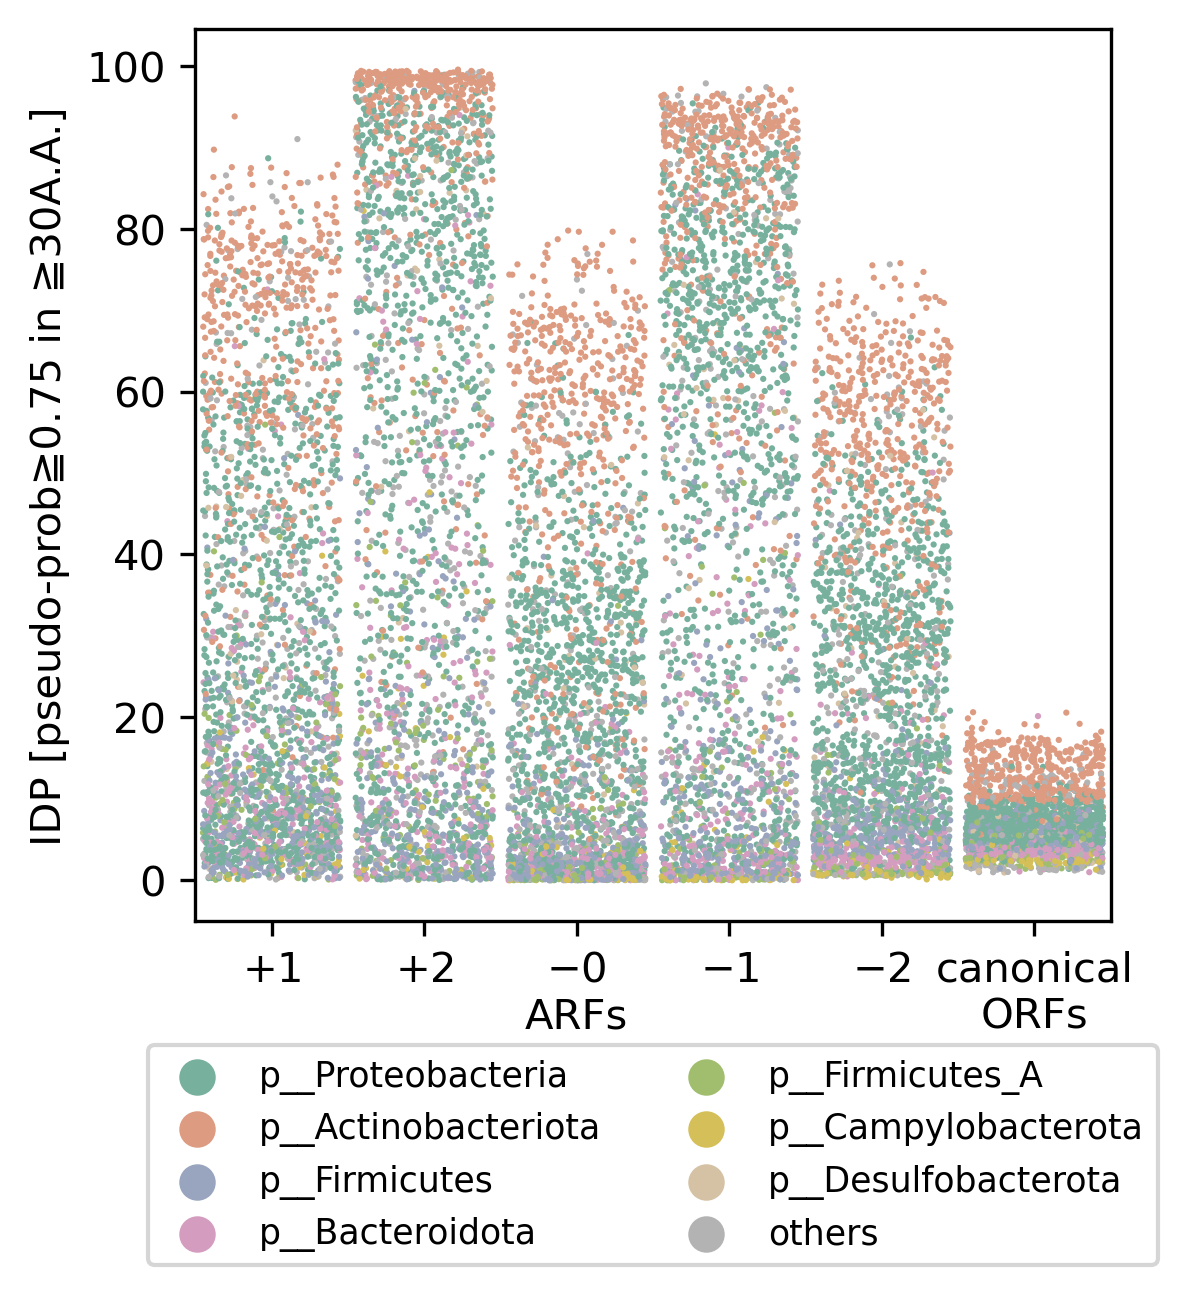

In [3]:
mm = 1 / 25.4
fr_mapping = {
     0: 'undet', 1: 'canonical\nORFs',
     2: '$+1$',  4: '$+2$',  8: '$-0$\nARFs', 16: '$-1$', 32: '$-2$'
}
phylum = metadata.acc.set_index('refseq')['gtdbrep'].map(
    metadata.tax_inuse['GTDB taxonomy'].str.split(';', expand=True)[1].rename('phylum')
)
phylum_counts = phylum.value_counts()
phylum = phylum.where(phylum.isin(idx := phylum_counts[phylum_counts >= 40].index), 'others')

len_thresh, prob_thresh = 300, 0.5
pltdata = (summary[len_thresh,prob_thresh] / summary[len_thresh,0.0].fillna(0) * 100) \
            .rename_axis(index='frame', columns='gcf').rename(index=fr_mapping).stack().rename('IDP [pseudo-prob≧0.75 in ≧30A.A.]').reset_index()
pltdata = pltdata.assign(phylum=pltdata['gcf'].map(phylum))

fig, ax = plt.subplots(figsize=(100*mm, 100*mm), dpi=300)
sns.stripplot(
    x='frame', y='IDP [pseudo-prob≧0.75 in ≧30A.A.]', data=pltdata, 
    hue='phylum', hue_order=[*idx, 'others'], 
    palette=sns.color_palette('Set2', desat=0.6),
    order=['$+1$', '$+2$', '$-0$\nARFs', '$-1$', '$-2$', 'canonical\nORFs'],
    jitter=0.45, s=1.5, ax=ax, 
)
ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.12), fontsize='small')
ax.set_xlabel(None)


- Reproducibility was confirmed by a rough figure. 
- Will upgrade the figure to a publication-quality one.